In [ ]:
# It is important to compare the performance for multiple different machine learning algorithm consistently.

In [1]:
# load dataset
import pandas as pd
filename='Boston_housing.csv'
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataset=pd.read_csv(filename,delim_whitespace=True,names=names)
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [8]:
# prepare models
models=[]
# Linear regression algorithm
from sklearn.linear_model import LinearRegression
models.append(('lr',LinearRegression()))
# K-Nearest Neighbors regression algorithm
from sklearn.neighbors import KNeighborsRegressor
models.append(('knn',KNeighborsRegressor()))
# Support Vector Regression
from sklearn.svm import SVR
models.append(("svr",SVR()))
# decision Tree Regression algorithm
from sklearn.tree import DecisionTreeRegressor
models.append(('decision_tree',DecisionTreeRegressor()))
# Random Forest Regression Algorithm
from sklearn.ensemble import RandomForestRegressor
models.append(('random_forest',RandomForestRegressor(n_estimators=10)))

In [9]:
# Evaluate each model in turn
scores=[]
names=[]
error='neg_mean_squared_error'
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for name, model in models:
    fold=KFold(n_splits=10,random_state=0)
    predict=cross_val_score(model,x,y,cv=fold,scoring=error)
    scores.append(predict)
    names.append(name)
    msg="%s : %f (%f)"%(name,predict.mean(),predict.std())
    print(msg)

lr : -34.705256 (45.573999)
knn : -107.286839 (79.839529)
svr : -91.047824 (71.101574)
decision_tree : -34.134591 (26.167607)
random_forest : -22.114856 (25.025878)


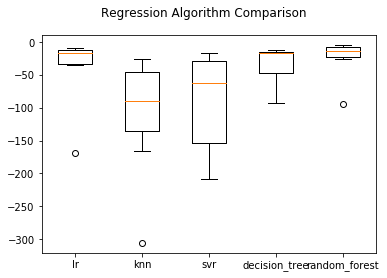

In [10]:
# Box plotting the algorithm comparision
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle('Regression Algorithm Comparison')
axis=fig.add_subplot(111)
plt.boxplot(scores)
axis.set_xticklabels(names)
plt.show()

In [ ]:
# It would suggest that both random forest regression, linear regression and decision tree regression.
# Those 3 algorithms worthy of further study of this problem